In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os, sys
import SimpleITK as sitk
%load_ext autoreload
%autoreload 2

In [172]:
animal = 'DK39'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
INPUT = os.path.join(DIR, 'CH1', 'thumbnail_aligned')
MASKED = os.path.join(DIR, 'rotated_masked')
ELASTIX = os.path.join(DIR, 'elastix')

In [177]:
PATH = '/home/eddyod/programming/pipeline_utility'
sys.path.append(PATH)
from utilities.utilities_registration import register_test, register_from_tutorial, register_correlation

In [181]:
# dk39, 169, 170 have a lot of shift and rotation
# 113, 114
# 137, 138 rotation off
# 192 193 shift off
fixed_index = str(193).zfill(3)
moving_index = str(194).zfill(3)

final_transform, fixed, moving, R = register_from_tutorial(INPUT, fixed_index, moving_index)    


# Always check the reason optimization terminated.
stop_condition = R.GetOptimizerStopConditionDescription()
iterations = R.GetOptimizerIteration()
metric_value = R.GetMetricValue()
finalParameters = final_transform.GetParameters()
fixedParameters = final_transform.GetFixedParameters()

print(f'Final metric value: {metric_value}')
print(f'Optimizer\'s stopping condition, {stop_condition}')
print('rotation, xshift, yshift', finalParameters)
print('center', fixedParameters)

Final metric value: -0.7949896279655385
Optimizer's stopping condition, RegularStepGradientDescentOptimizerv4: Step too small after 30 iterations. Current step (6.10352e-05) is less than minimum step (0.0001).
rotation, xshift, yshift (-2.3107206281015616e-05, 0.017336041635198, -0.016383032026737805)
center (895.8247752464823, 516.8031783245681)


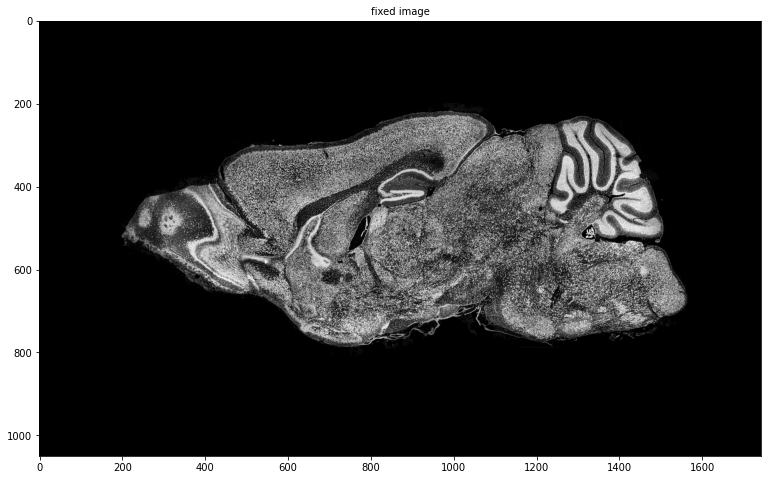

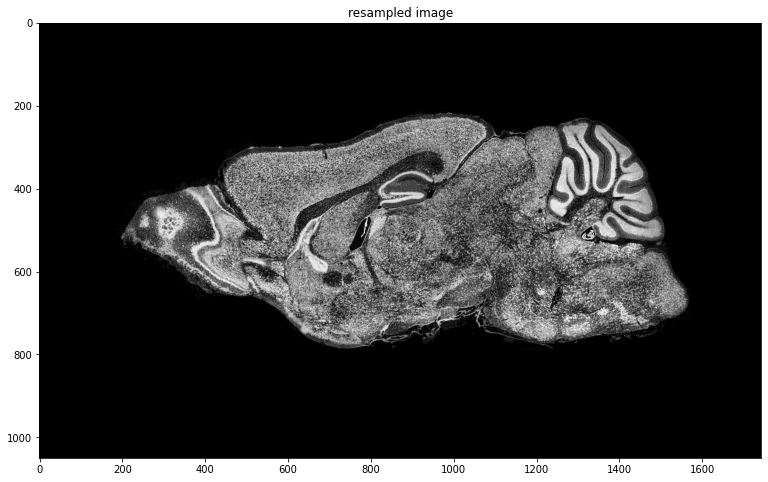

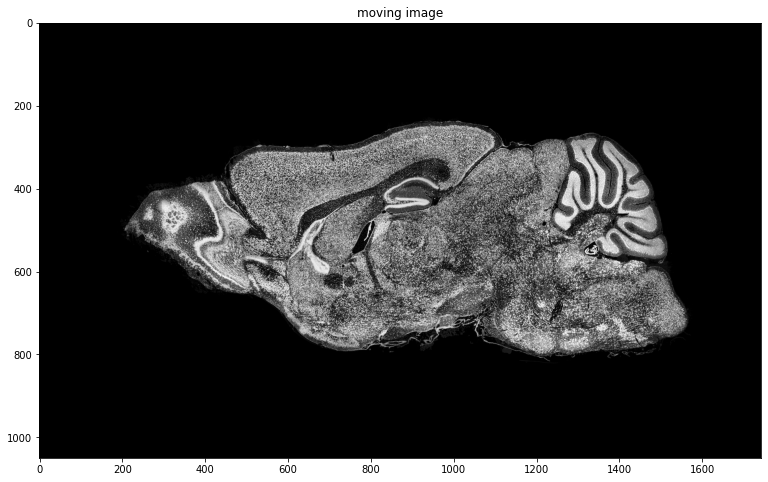

In [171]:
moving_resampled = sitk.Resample(moving, fixed, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
fig = plt.figure(figsize=(15,8))
plt.imshow(sitk.GetArrayViewFromImage(fixed), cmap='gray')
plt.title('fixed image', fontsize=10)

fig = plt.figure(figsize=(15, 8))
plt.imshow(sitk.GetArrayViewFromImage(moving_resampled), cmap='gray')
plt.title('resampled image')

fig = plt.figure(figsize=(15, 8))
plt.title('moving image')
plt.imshow(sitk.GetArrayViewFromImage(moving), cmap='gray')
    

In [168]:
def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

In [165]:
import pickle
import json
from collections import OrderedDict
from utilities.file_location import FileLocationManager

fileLocationManager = FileLocationManager('DK39')
rotations = OrderedDict()
translations = OrderedDict()
rotations['junk'] = np.array([1,2,3,4])
translations['junkT'] = np.array([1,2,3,4])

rotation_storage = os.path.join(fileLocationManager.elastix_dir, 'rotations.pickle')    
save_dict(rotations, rotation_storage)